In [191]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import classify
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("whitegrid")
# sns.set_palette("bright")
# current_palette = sns.color_palette('colorblind', 3)
palette1 = sns.color_palette('colorblind', 3)
palette2 = sns.color_palette('bright', 7)[-2:]
sns.set_palette(sns.color_palette('bright')[4:])

In [112]:
CALIBRATION_FILE = "../../../calibration/out/C.mat"
TEST_FOLDER = "../../../experiment_data/blue_feet"
TEST_FILE = TEST_FOLDER + "/4/important_experiments/2016.10.02_20.40.19_trial_imudata.txt"

DATA_FOLDER ="/Users/Can/biomimetics/veloplot/experiment_data/blue_feet/mast/"
CTL_FILES = DATA_FOLDER + "0/" + "*.csv"  # No touch data
ACT_FILES = DATA_FOLDER + "1/" + "*.csv"  # Touch data

In [113]:
test_data, df, df_segs = classify.get_test_data(TEST_FILE, CALIBRATION_FILE)

In [114]:
ylabels = {
    "AX": "Acceleration m/s^2",
    "AY": "Acceleration m/s^2",
    "AZ": "Acceleration m/s^2",
    "A_mag": "Acceleration m/s^2",
    "Fx": "Force (N)",
    "Fy": "Force (N)",
    "Fz": "Force (N)",
    "F_mag": "Force (N)",
    "Mx": "Moment (mN * m)",
    "My": "Moment (mN * m)",
    "Mz": "Moment (mN * m)",
    "M_mag": "Moment (mN * m)",
    "TorqueL": "Torgue " + r'$(mN * m)$',
    "TorqueR": "Torque " + r'$(mN * m)$',
    "Right Leg Pos": "Leg position (rad)",
    "Left Leg Pos": "Leg position (rad)",
    "RBEMF": "Back EMF",
    "LBEMF": "Back EMF",
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power (W)",
    "PowerL": "Power (W)",
    "GyroX": "degrees/s",
    "GyroY": "degrees/s",
    "GyroZ": "degrees/s",
    "Gyro_mag": "degrees/s",
    "Energy": "Energy",
    "VBatt": "Battery Voltage (V)",
    "AngleZ": "Anglez"
}

titles = {
    "AX": "Accelerations",
    "AY": "Accelerations",
    "AZ": "Accelerations",
    "A_mag": "Magnitude of Accelerations",
    "Fx": "Forces",
    "Fy": "Forces",
    "Fz": "Forces",
    "F_mag": "Magnitude of Forces",
    "Mx": "Moments",
    "My": "Moments",
    "Mz": "Moments",
    "M_mag": "Magnitude of Moments",
    "TorqueL": "Torques",
    "TorqueR": "Torques",
    "Right Leg Pos": "Leg Positions",
    "Left Leg Pos": "Leg Positions",
    "RBEMF": "Back EMF",
    "LBEMF": "Back EMF",
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power",
    "PowerL": "Power",
    "GyroX": "Gyro",
    "GyroY": "Gyro",
    "GyroZ": "Gyro",
    "Gyro_mag": "Speed of rotation",
    "Energy": "Energy",
    "VBatt": "VBatt",
    "AngleZ": "Anglez"
}

In [176]:
def plot_columns(df,
                 labels,
                 columns,
                 output_dir="out/",
                 output_filename="plots.png",
                 display=False,
                 save_figure=True,
                 color_intervals=None,
                 figsize=None,
                 forces_drawn=True):
    """
    Columns - list of columns to plot with respect to time
    figsize - 2 item tuple containing (height, width) of tuple. For the
        notebooks, this is not necessary as figure.set_size_inches(...) will
        determine the line chart size. However, this is necessary while using
        the matplotlib gui interface.
    """
    xfont = {'fontname':'Times New Roman'}
    handles, labls = [], []
    figure, axarr = plt.subplots(len(columns))

    for i in range(len(columns)):
        # If len(columns) > 1, then axarr is an array of axes.
        ax = axarr[i] if len(columns) > 1 else axarr
        if type(columns[i]) == list:
            j=0
            if not forces_drawn:
                for col in columns[i]:
                    ax.plot(df["time"], df[col], label=labels[i][j], linewidth=4, c=palette1[j])
                    ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=40)                                                
                    j+=1
                forces_drawn = True
            else:       
                for col in columns[i]:
                    ax.plot(df["time"], df[col], label=labels[i][j], linewidth=4, c=palette2[j])
                    ax.set_ylabel(ylabels[col],fontdict=xfont, fontsize=40)                    
                    j+=1
        else:
            ax.plot(df["time"], df[columns[i]], label=labels[i])
            ax.set_ylabel(ylabels[columns[i]],fontdict=xfont, fontsize=40)
################################################################################
###################### For Coloring the Region #################################
################################################################################
        if color_intervals:
            for k in xrange(len(color_intervals)):
                if k == 1:
                    ax.axvspan(color_intervals[k][0], color_intervals[k][1], facecolor='#FF0000', alpha=0.5)
                else:
                    ax.axvspan(color_intervals[k][0], color_intervals[k][1], facecolor='#5a5858', alpha=0.5)
################################################################################

        ax.set_xlim([0, df["time"].max()])
######################### TURN ON FOR TIME LABEL ###############################
        if i == len(columns)-1: # so that only last plot has time axes labeled.#
            ax.set_xlabel("Time (s)",fontdict=xfont, fontsize=40)              #
                                                                               #
################################################################################

#         ax.legend(bbox_to_anchor=(0, 1.2), loc=2, borderaxespad=0.,ncol=3, fontsize=40)

        ax.tick_params(axis='both', which='major', labelsize=40)

    ################# TURN ON FOR LABELS ##########################################
#         h, l = ax.get_legend_handles_labels()
#         handles.extend(h)
#         labls.extend(l)
###############################################################################

#     plt.figlegend(handles[:5], labls[:5], bbox_to_anchor=(0.5, 1.1), loc=9, ncol=5, borderaxespad=0.,fontsize=40)
    figure.set_size_inches(16, 16)
    plt.tight_layout()

    if display:
        plt.show()

    if save_figure:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print "Saving image as", output_dir + output_filename
        figure.savefig(output_dir + output_filename, dpi=450, bbox_inches='tight')
        print "Image saved."


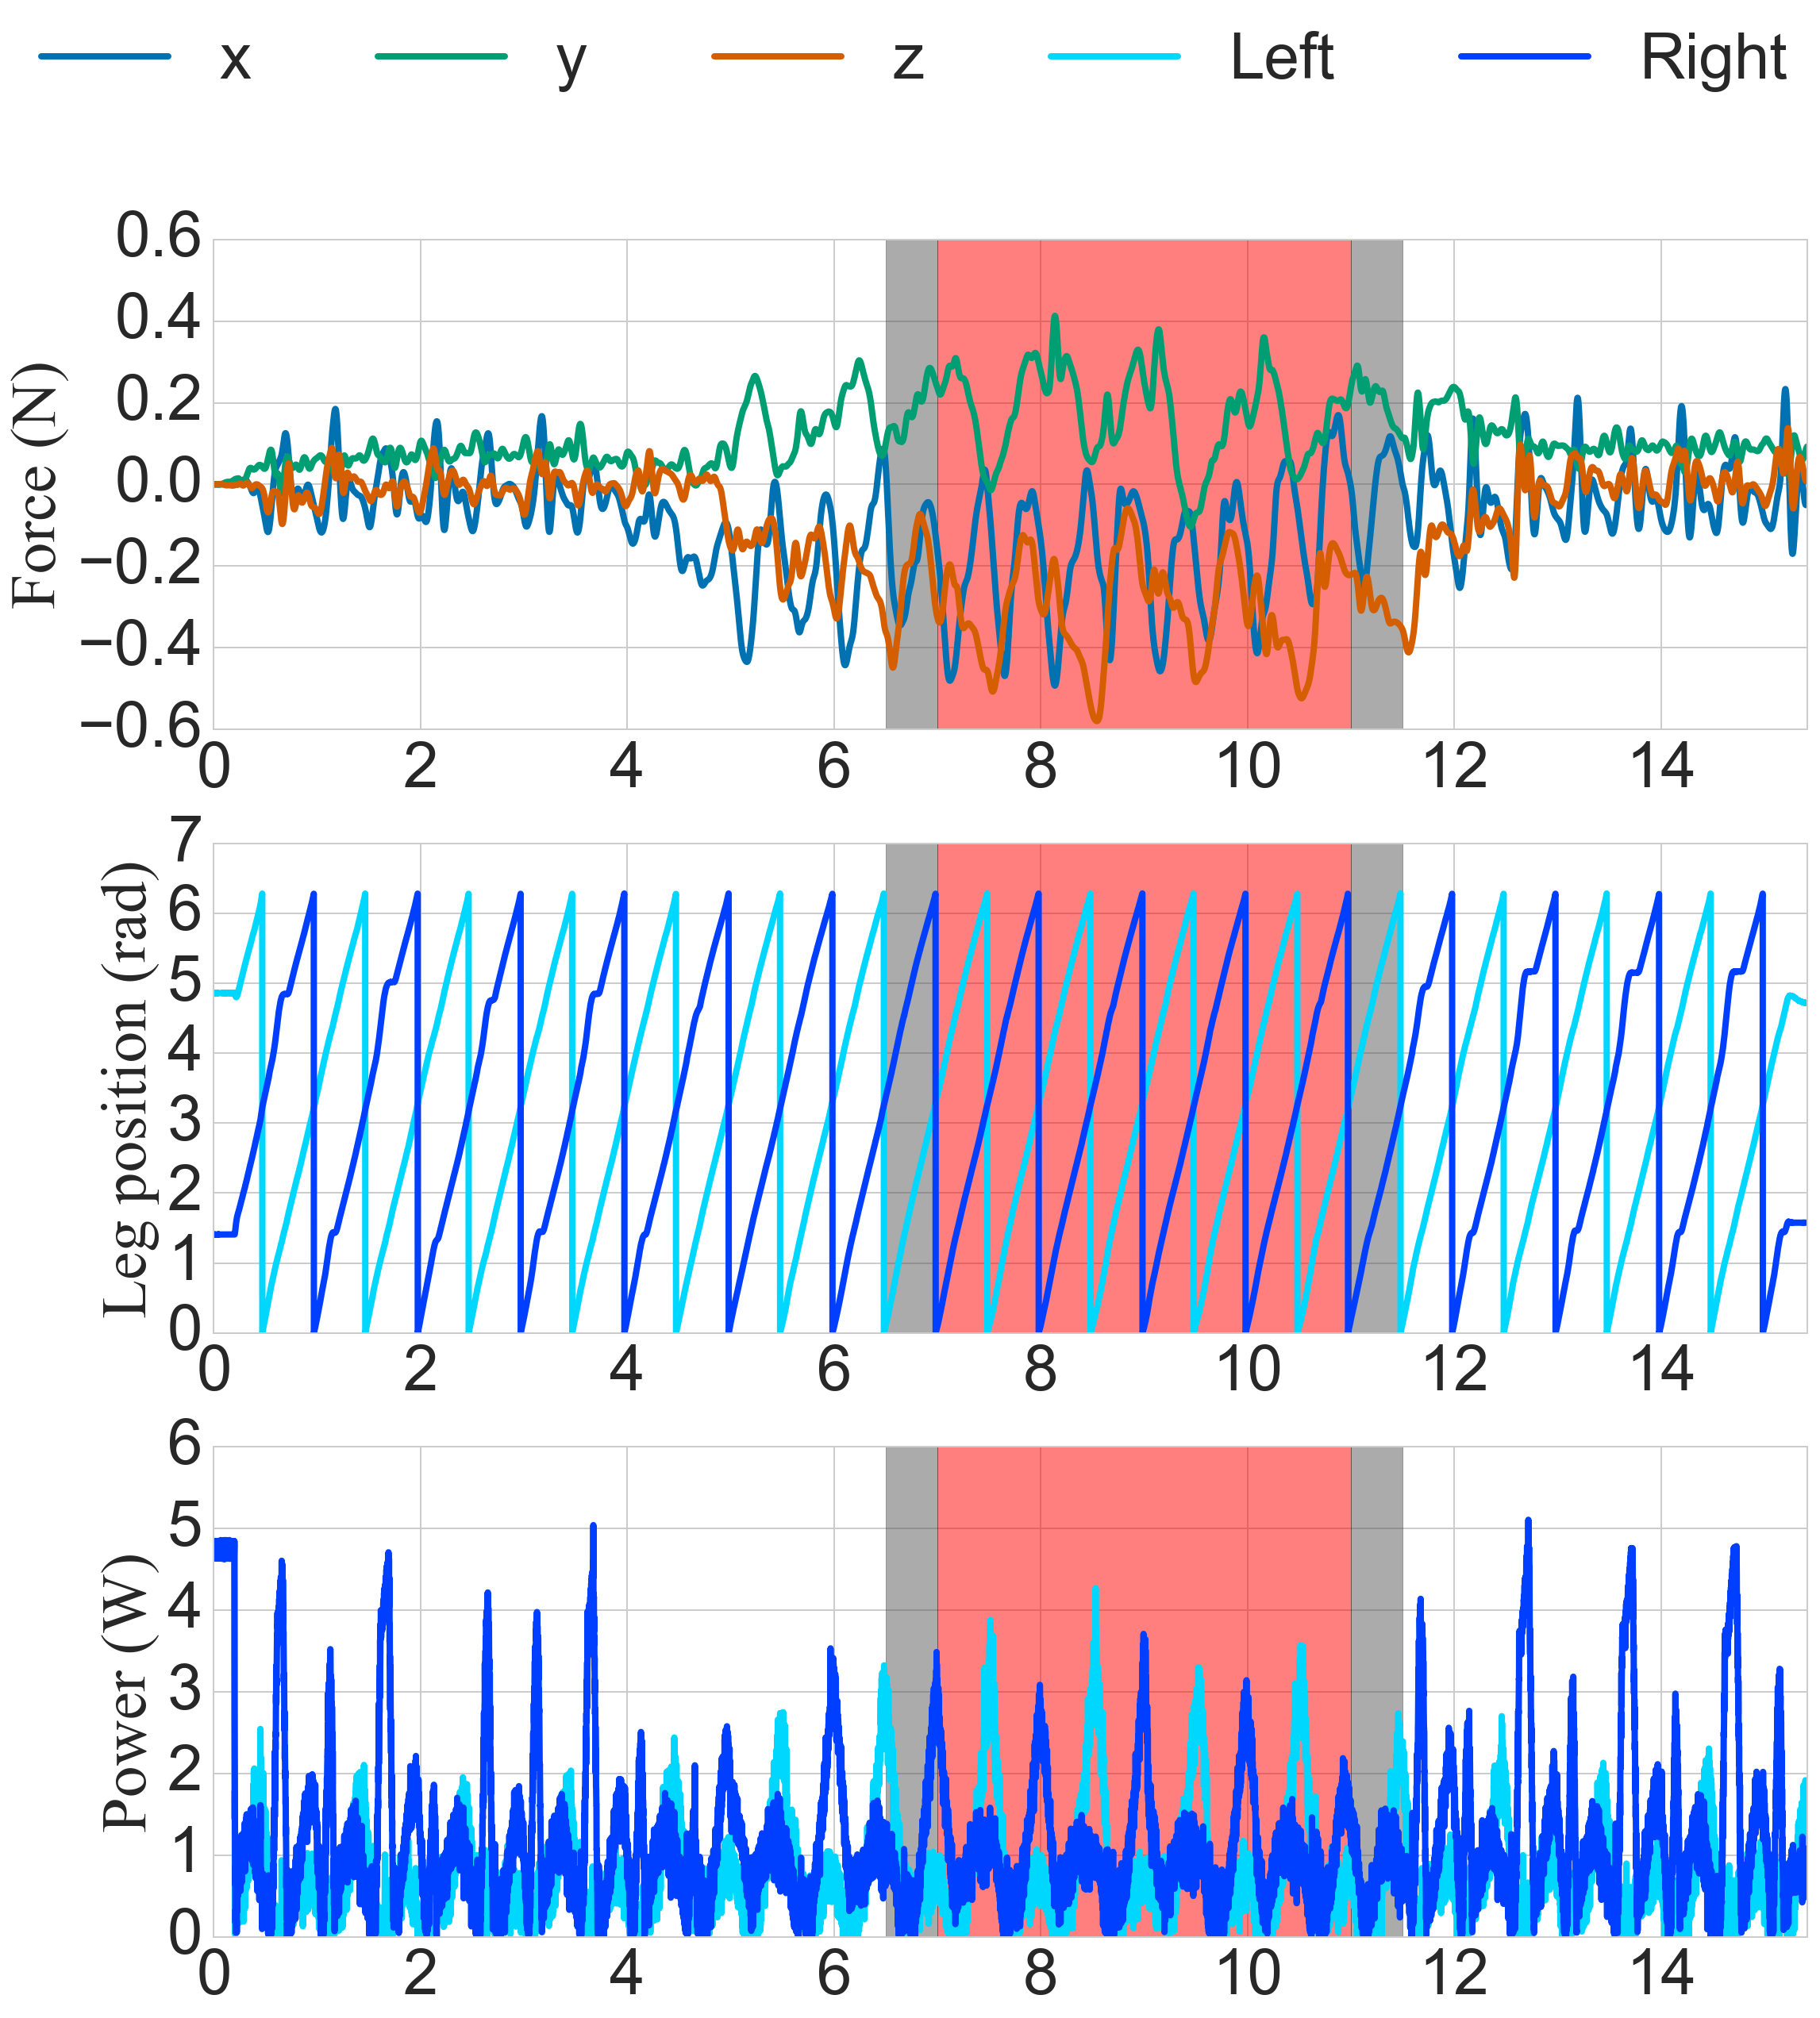

Saving image as ./out/fig12_1.jpg
Image saved.


In [168]:
color_intervals = [(6.5,7.0), (7.0, 11.0), (11.0,11.5)]
xfont = {'fontname':'Times New Roman'}
labels2 = [["x", "y", "z"],['Left', 'Right'],['Left', 'Right']]
plot_columns(
    df,
    labels2,
    columns=[["Fx", "Fy", "Fz"],['Left Leg Pos', 'Right Leg Pos'],['PowerL', 'PowerR']],
    display=True,
    save_figure=True,
    output_dir="./out/",
    output_filename="fig12_1.jpg",
    color_intervals=color_intervals,
    figsize=None,
    forces_drawn=False)

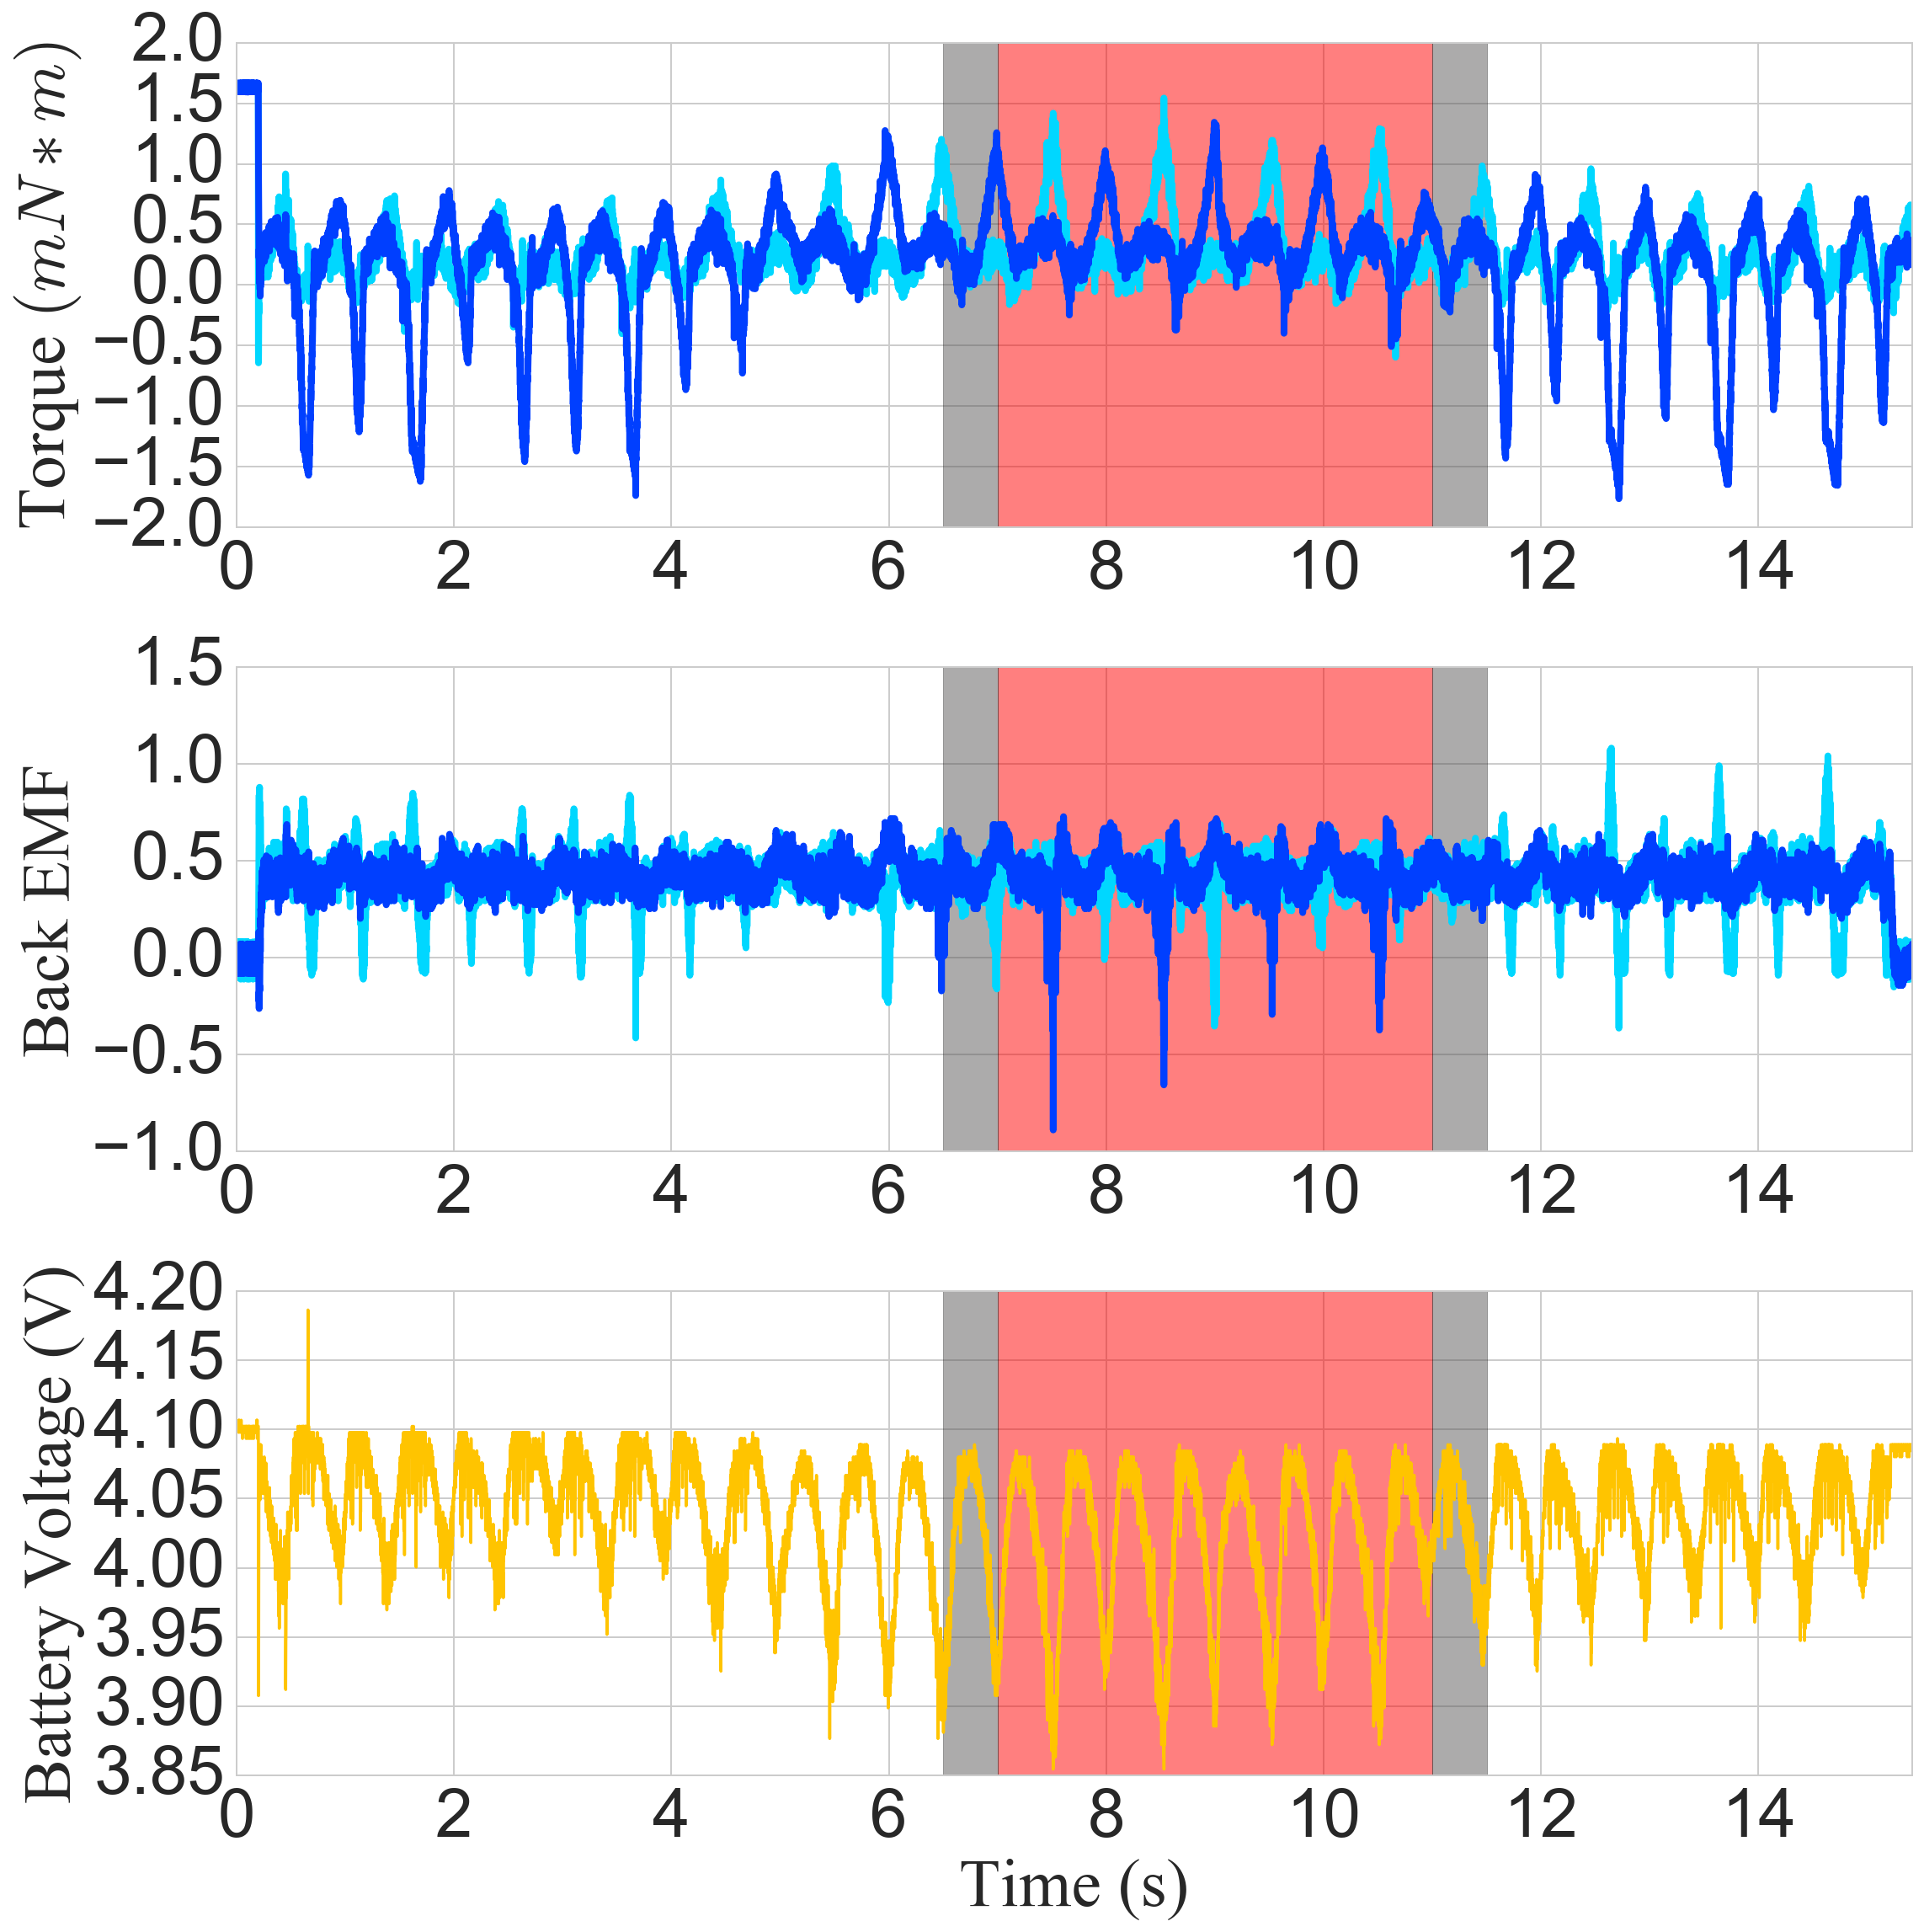

Saving image as ./out/fig12_2.jpg
Image saved.


In [192]:
labels2 = [["Left", "Right"],['Left', 'Right'],'Battery Voltage']
plot_columns(
    df,
    labels2,
    columns=[['TorqueL', 'TorqueR'],['RBEMF', 'LBEMF'],'VBatt'],
    display=True,
    save_figure=True,
    output_dir="./out/",
    output_filename="fig12_2.jpg",
    color_intervals=color_intervals,
    figsize=None)